# Mid Term Project
by:
Srini and Denny

<a id='content'></a>
### Table of content
<a href='#setup'>setup libraries</a>
- pandas, numpy
- sklearn

<a href='#helper_function'>helper functions</a>
- plot data

<a href='#data_functions'>data functions</a>
- interquartile
- droping tables
- transformation

<a href='#raw_data'>raw data</a>
- loading raw data
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

<a href='#analyze_raw_data'>analyze Raw Data</a>

<a href='#plot_regression'>plot regression graph</a>

<a href='#feature_importance'>feature importance</a>

<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [247]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [248]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [249]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [250]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### create dummy table for categorie

In [251]:
def create_dummies_for_categorie(data, name):
    data = pd.get_dummies(data, columns=[name], drop_first = True)
    return data

#### perform transformation operation on data

In [252]:
# transform operation

pwr = PowerTransformer()
robust = RobustScaler()
minMax = MinMaxScaler()

def aggregate_transform(data: pd.DataFrame, name: str, operator: str = 'pwr', lamda_value: float = 0)-> pd.DataFrame:
    transformer = pwr

    if operator == 'pwr':
        transformer = pwr
    elif operator == 'minmax':
        transformer = minMax
    elif operator == 'robust':
        transformer = robust
    if lamda_value != 0:
        transformer.lambdas_ = lamda_value
    data[name] = transformer.fit_transform(data[name].to_numpy().reshape(-1,1))
    return data


#### plot function 

In [253]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line
def plot_train_vs_test(x_train, y_pred, x_test, y_test, y_pred_train):
    fig, ax = plt.subplots(2,3,figsize=(18,10))
    ax[0,0].plot(y_pred, y_test, 'o',color='red')
    ax[0,0].set_xlabel("y_test")
    ax[0,0].set_ylabel("y_pred")
    ax[0,0].set_title("Test Set -Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[0,1].hist(y_test - y_pred, color='red')
    ax[0,1].set_xlabel("Test y-y_pred")
    ax[0,1].set_title("Test Set Residual histogram")

    ax[0,2].plot(y_pred,y_test - y_pred,"o", color='red')
    ax[0,2].set_xlabel("predited")
    ax[0,2].set_ylabel("residuals")
    ax[0,2].set_title("Residuals by Predicted")
    ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



    ax[1,0].plot(y_pred_train, y_train, 'o')
    ax[1,0].set_xlabel("y_train")
    ax[1,0].set_ylabel("y_pred_train")
    ax[1,0].set_title("Train set Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[1,1].hist(y_train - y_pred_train)
    ax[1,1].set_xlabel("Train y-y_pred")
    ax[1,1].set_title("Train Residual histogram")

    ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
    ax[1,2].set_xlabel("predited")
    ax[1,2].set_ylabel("residuals")
    ax[1,2].set_title("Residuals by Predicted -- Train set")
    ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')
    

<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [254]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [255]:
raw_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

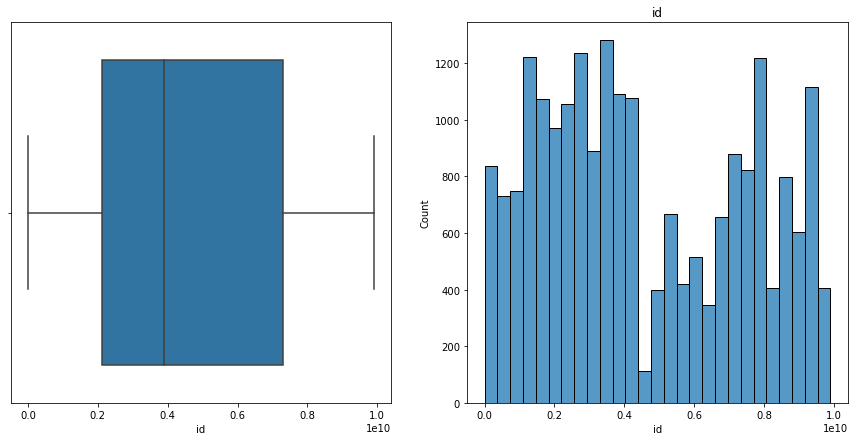

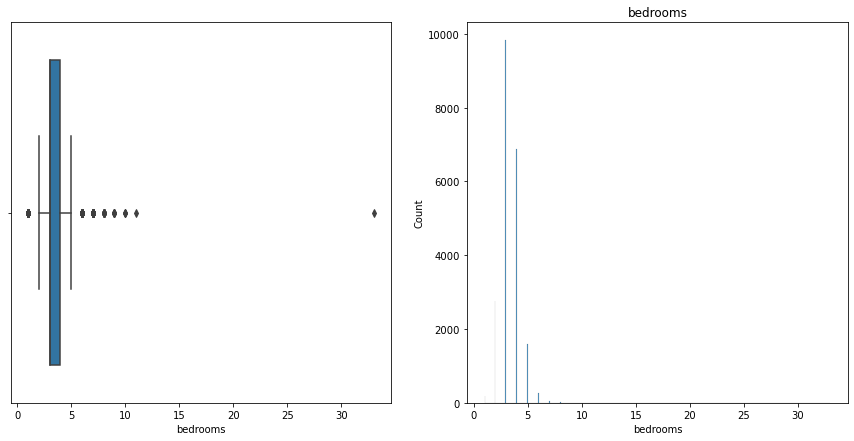

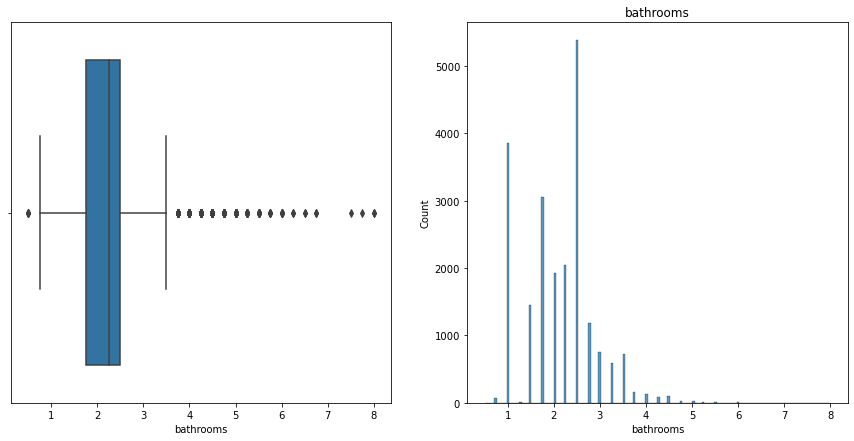

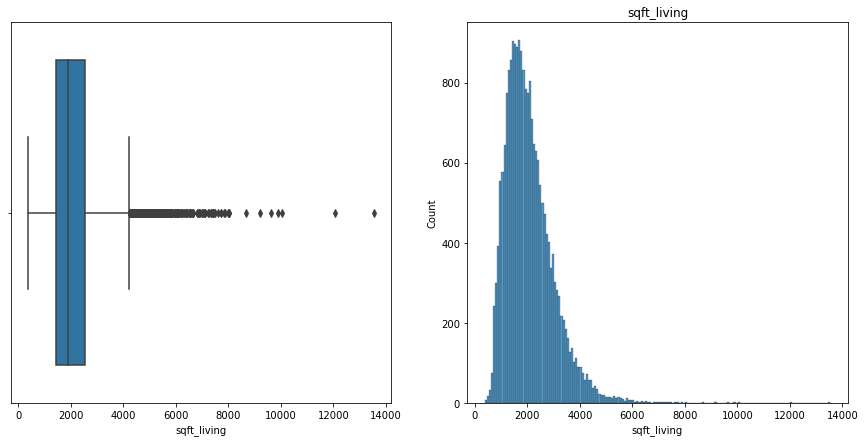

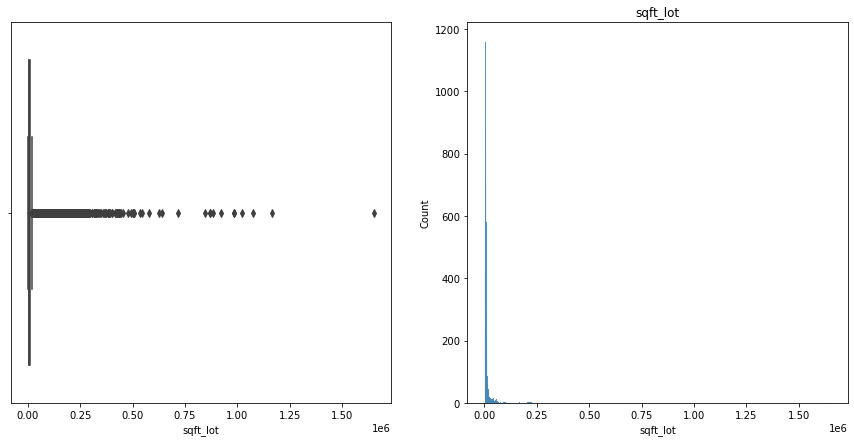

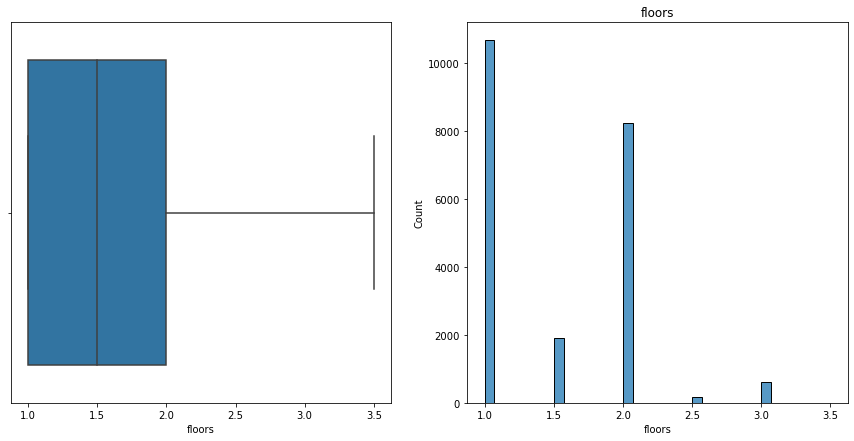

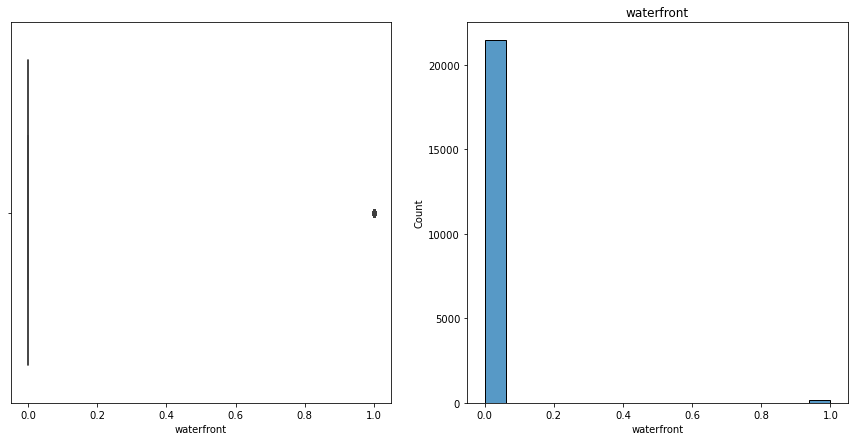

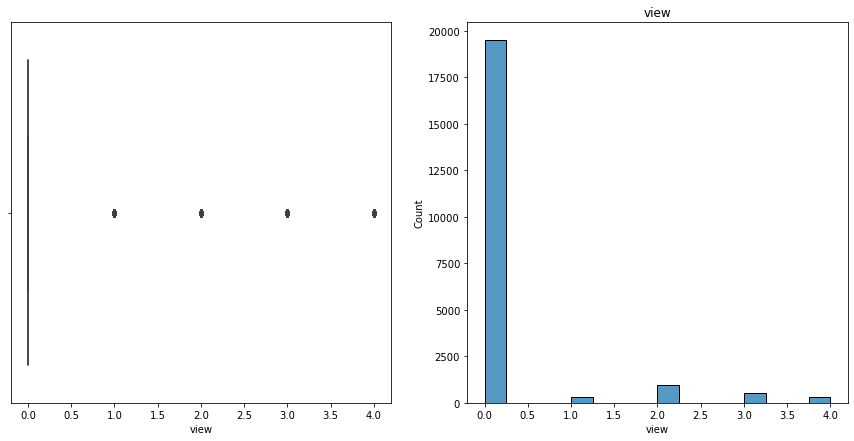

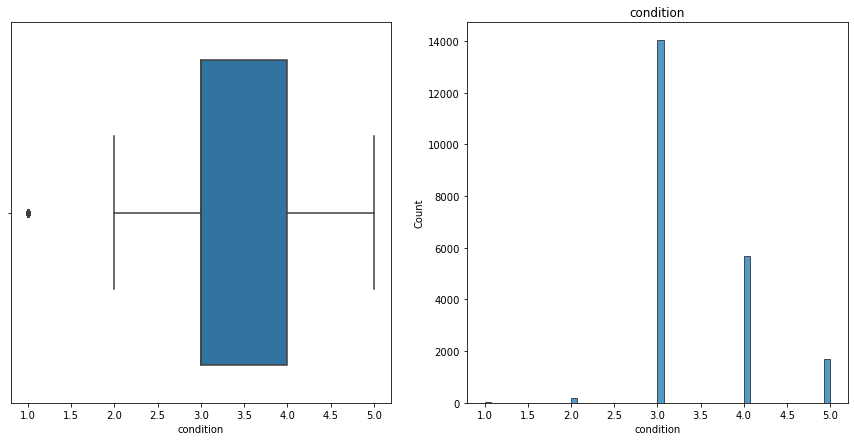

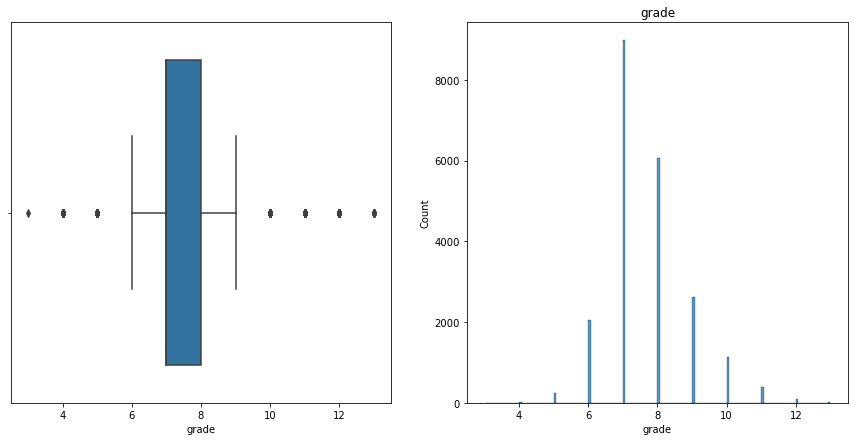

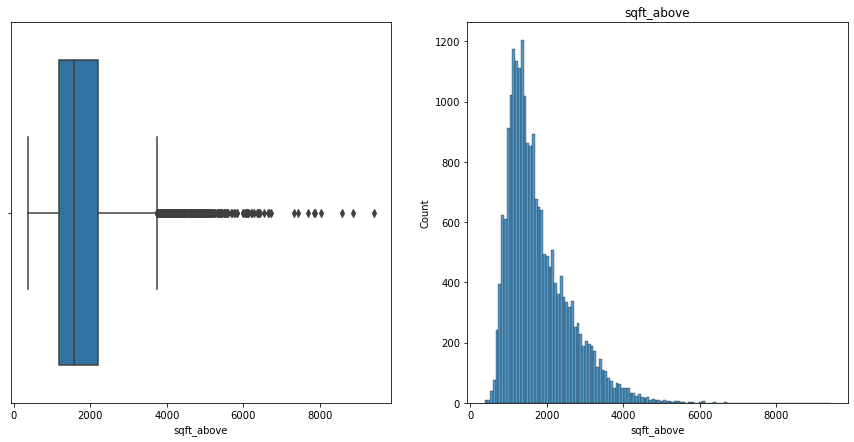

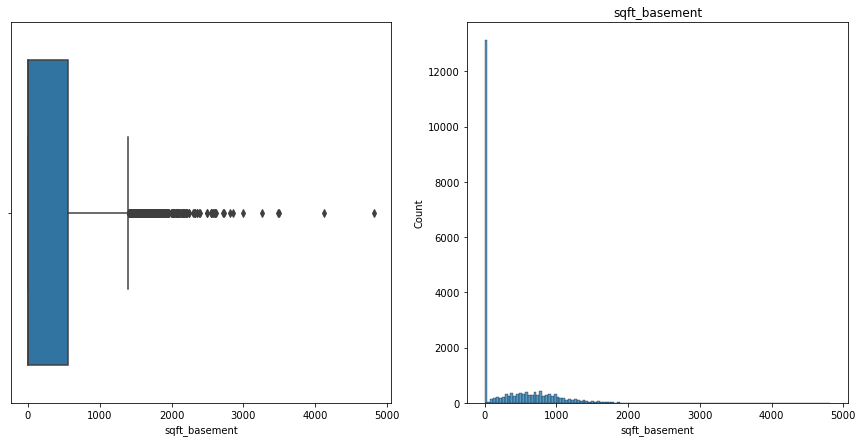

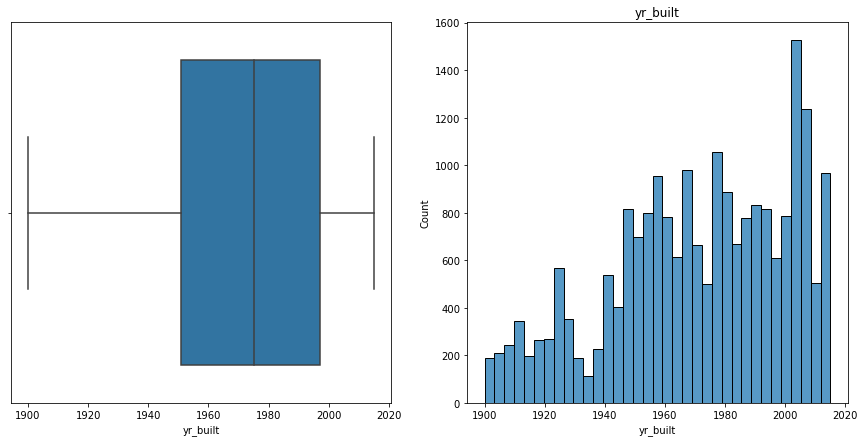

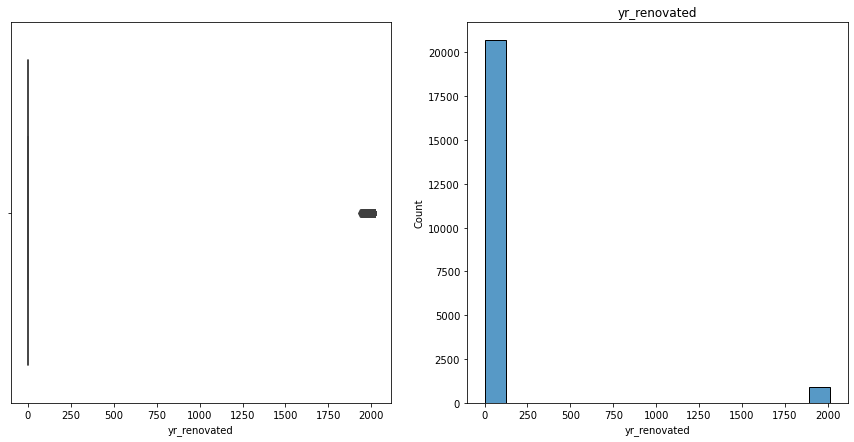

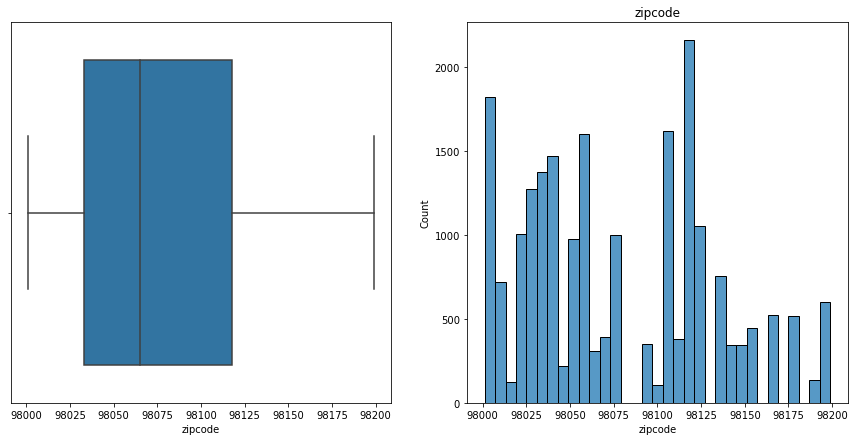

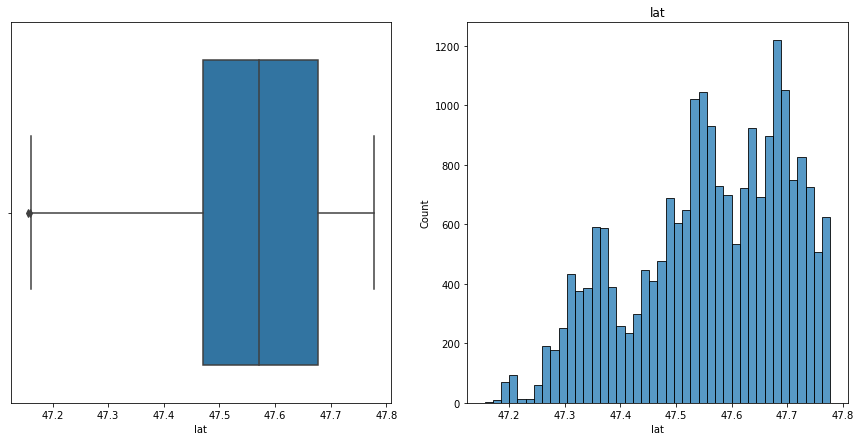

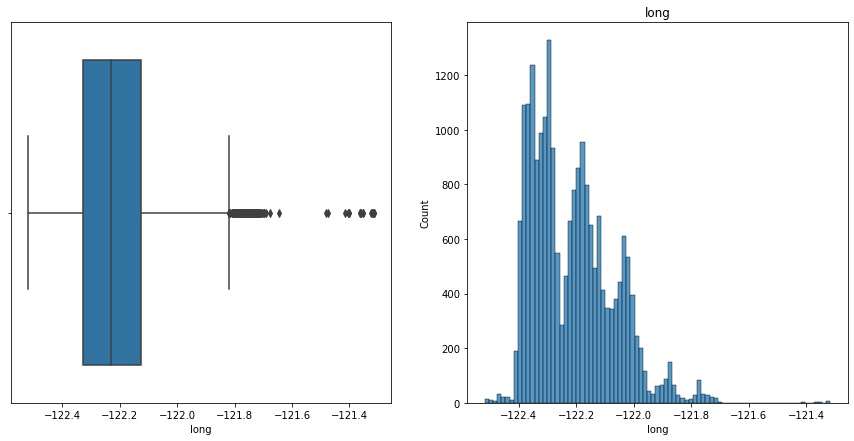

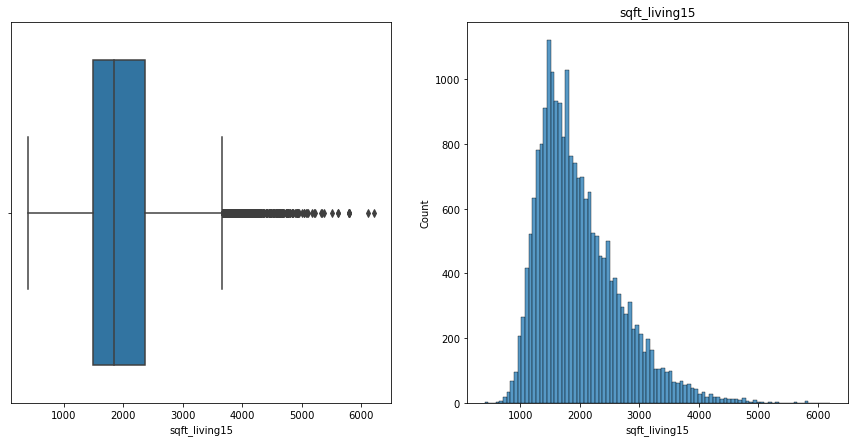

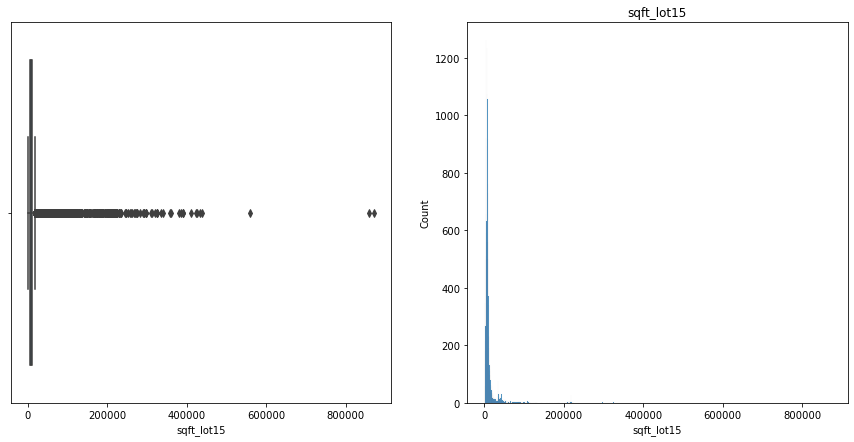

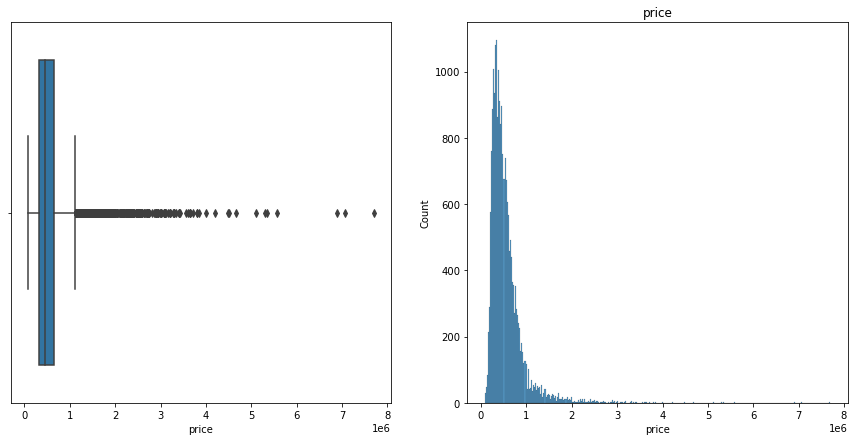

In [256]:
# analyze raw data
plot_numeric(work_copy)
#sns.pairplot(work_copy,diag_kind="kde")

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

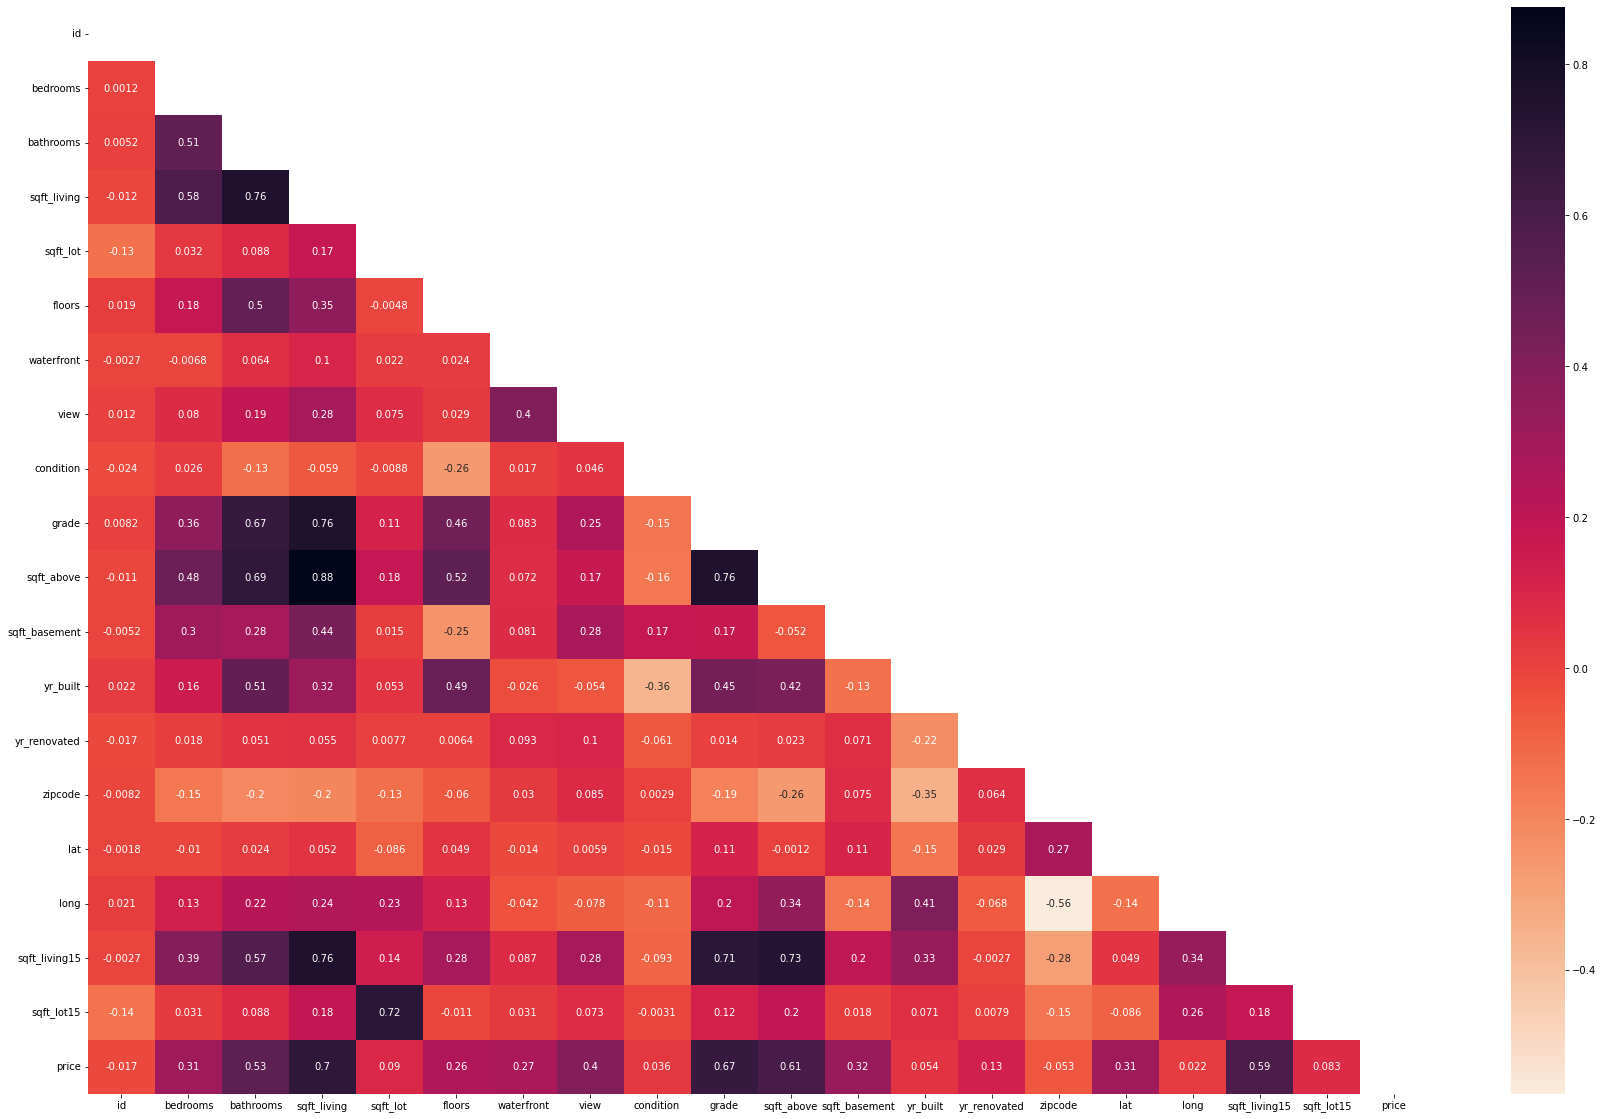

In [257]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

<a id='analyze_raw_data'></a>
<a href='#content'>back to content list</a>
### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [258]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'sqft_lot','sqft_above', 'view', 'sqft_lot15'], inplace=True)

# removed floors, sqft_living15, sqft_above, yr_renovated

In [259]:
# droping long and lat coordinates, as this location information is allready included in the zipcodes
work_copy.drop(columns=['long', 'lat'], inplace=True)

#work_copy.drop(columns=['long'], inplace=True)

In [260]:
# test for dropping all to fill in an input value and receive an return price
#work_copy.drop(columns=['waterfront', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'sqft_basement', 'lat','zipcode', 'condition'], inplace=True)

In [261]:
# interquartile sqft_living

work_copy =  work_copy[work_copy['bedrooms'] != 33]
work_copy = reduce_to_interquartile(data=work_copy, name='bedrooms')

In [262]:
#work_copy = reduce_to_interquartile(data=work_copy, name='price')
transpower = PowerTransformer(method='box-cox')
work_copy['price'] = transpower.fit_transform(work_copy['price'].to_numpy().reshape(-1,1))
work_copy['sqft_living'] = transpower.fit_transform(work_copy['sqft_living'].to_numpy().reshape(-1,1))
work_copy['sqft_living15'] = transpower.fit_transform(work_copy['sqft_living15'].to_numpy().reshape(-1,1))
work_copy['yr_built'] = transpower.fit_transform(work_copy['yr_built'].to_numpy().reshape(-1,1))
trans_f = PowerTransformer()
#work_copy['yr_renovated'] = trans_f.fit_transform(work_copy['yr_renovated'].to_numpy().reshape(-1,1))

In [263]:
# basement has no real influence so i transform this to an binary has or has not field 0 or 1
work_copy['sqft_basement'].values[work_copy['sqft_basement'] != 0] = 1


In [264]:
work_copy['yr_renovated'].values[work_copy['yr_renovated'] != 0] = 1

In [265]:
work_copy = create_dummies_for_categorie(work_copy, 'zipcode')

In [266]:
work_copy = create_dummies_for_categorie(work_copy, 'grade')

In [267]:
work_copy = create_dummies_for_categorie(work_copy, 'floors')

In [268]:
work_copy = create_dummies_for_categorie(work_copy, 'bedrooms')

In [269]:
work_copy = create_dummies_for_categorie(work_copy, 'condition')

In [270]:
#plot_numeric(work_copy)

#sns.pairplot(work_copy,diag_kind="kde")

In [271]:
work_copy.describe()

,bathrooms,sqft_living,waterfront,sqft_basement,yr_built,yr_renovated,sqft_living15,price,zipcode_98002,zipcode_98003,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,21067.000000,2.106700e+04,21067.000000,21067.000000,2.106700e+04,21067.000000,2.106700e+04,2.106700e+04,21067.000000,21067.000000,...,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000
mean,2.108618,-5.498257e-16,0.007310,0.390469,5.972659e-15,0.041202,2.433068e-15,-1.387290e-14,0.008924,0.013054,...,0.006740,0.028575,0.000285,0.466322,0.326672,0.075996,0.007452,0.650211,0.262448,0.078749
std,0.746090,1.000024e+00,0.085188,0.487867,1.000024e+00,0.198762,1.000024e+00,1.000024e+00,0.094046,0.113507,...,0.081825,0.166614,0.016874,0.498876,0.469007,0.264997,0.086007,0.476914,0.439975,0.269353
min,0.500000,-3.568414e+00,0.000000,0.000000,-2.010479e+00,0.000000,-5.682120e+00,-4.248885e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,-6.885356e-01,0.000000,0.000000,-7.554753e-01,0.000000,-7.010326e-01,-6.739056e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,1.311971e-02,0.000000,0.000000,5.008419e-03,0.000000,-3.271712e-02,4.363233e-03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,6.925507e-01,0.000000,1.000000,8.843285e-01,0.000000,7.156469e-01,6.653952e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,3.994567e+00,1.000000,1.000000,1.734074e+00,1.000000,3.254690e+00,3.957004e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### First Approach with unfilterd data

In [272]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [273]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.20, random_state= 42)

In [274]:
x_train.describe()

,bathrooms,sqft_living,waterfront,sqft_basement,yr_built,yr_renovated,sqft_living15,zipcode_98002,zipcode_98003,zipcode_98004,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,...,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000
mean,2.105471,-0.000903,0.007714,0.390850,-0.000347,0.041654,-0.002983,0.008604,0.012639,0.014834,...,0.006646,0.028304,0.000237,0.467573,0.325995,0.075951,0.007239,0.650745,0.261140,0.079808
std,0.743450,0.998740,0.087491,0.487955,1.001000,0.199804,0.998995,0.092360,0.111713,0.120892,...,0.081252,0.165844,0.015405,0.498962,0.468759,0.264927,0.084777,0.476749,0.439269,0.271003
min,0.500000,-3.568414,0.000000,0.000000,-2.010479,0.000000,-5.682120,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,-0.688536,0.000000,0.000000,-0.755475,0.000000,-0.701033,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,0.013120,0.000000,0.000000,0.005008,0.000000,-0.032717,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,0.702070,0.000000,1.000000,0.884328,0.000000,0.715647,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,3.994567,1.000000,1.000000,1.734074,1.000000,3.216518,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
scaler_train = StandardScaler().fit(x_train)
#scaler_train = RobustScaler().fit(x_train)
#scaler_train = MinMaxScaler().fit(x_train)

scaler_train.transform(x_train)
scaler_train.transform(x_test)


array([[ 0.53068922,  0.26671878, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.86696932,  0.60680728, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.19440912,  0.07666231, -0.08816873, ..., -1.36500359,
         1.68206925, -0.29449861],
       ...,
       [ 0.53068922,  0.25527183, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922,  0.4952688 , -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922, -0.52425033, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861]])

In [276]:
model_l = LinearRegression()
#model_l = Lasso()

model_l.fit(x_train, y_train)

LinearRegression()

In [277]:
y_pred_train = model_l.predict(x_train)
y_pred_test = model_l.predict(x_test)


In [278]:
x_train_sm = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train_sm).fit()

#model.summary()
model.summary2()

/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.864     
Dependent Variable: y                AIC:                14273.6091
Date:               2021-11-17 11:55 BIC:                15031.3730
No. Observations:   16853            Log-Likelihood:     -7038.8   
Df Model:           97               F-statistic:        1107.     
Df Residuals:       16755            Prob (F-statistic): 0.00      
R-squared:          0.865            Scale:              0.13578   
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          -2.1151    0.1355  -15.6113  0.0000  -2.3807  -1.8495
bathrooms       0.0683    0.0071    9.5722  0.0000   0.0544   0.0823
sqft_living     0.3561    0.0068   52.4655  0.0000   0.3428   0.3694
waterfront      1.0684    0.0339   31.5380  0.0000   1.0020   1.1348
sqft_basement  -0.0803    0.0077  -10.4516  0.0000  -0.0953  -0.0652
yr_built       -0.0250    0.0055   -4.5314  0.0000  -0.0358  -0.0142
yr_renovated    0.1346    0.0155    8.6579  0.0000   0.1041   0.1650
sqft_living15   0.1330    0.0049   27.0795  0.0000   0.1234   0.1426
zipcode_98002  -0.0625    0.0378   -1.6514  0.0987  -0.1367   0.0117
zipcode_98003   0.0342    0.0335    1.0200  0.3078  -0.0315   0.1000
zipcode_98004   2.0123    0.0326   61.7148  0.0000   1.9484   2.0763
zipcode_98005   1.3961    0.0401   34.7748  0.0000   1.3174   1.4748
zipcode_98006   1.2431    0.0296   42.0386  0.0000   1.1851   1.3010
zipcode_98007   1.2625    0.0426   29.6181  0.0000   1.1789   1.3460
zipcode_98008   1.2982    0.0334   38.8562  0.0000   1.2327   1.3637
zipcode_98010   0.5859    0.0466   12.5741  0.0000   0.4946   0.6773
zipcode_98011   0.8762    0.0374   23.3965  0.0000   0.8028   0.9496
zipcode_98014   0.7355    0.0437   16.8418  0.0000   0.6499   0.8211
zipcode_98019   0.6615    0.0380   17.3930  0.0000   0.5869   0.7360
zipcode_98022   0.2283    0.0355    6.4306  0.0000   0.1587   0.2979
zipcode_98023  -0.0940    0.0288   -3.2587  0.0011  -0.1505  -0.0375
zipcode_98024   1.0367    0.0536   19.3325  0.0000   0.9315   1.1418
zipcode_98027   1.0367    0.0304   34.1371  0.0000   0.9771   1.0962
zipcode_98028   0.8209    0.0329   24.9670  0.0000   0.7564   0.8853
zipcode_98029   1.1532    0.0324   35.5944  0.0000   1.0897   1.2167
zipcode_98030   0.0889    0.0333    2.6667  0.0077   0.0236   0.1543
zipcode_98031   0.1219    0.0335    3.6425  0.0003   0.0563   0.1875
zipcode_98032  -0.0657    0.0440   -1.4923  0.1357  -0.1520   0.0206
zipcode_98033   1.5028    0.0299   50.2590  0.0000   1.4442   1.5614
zipcode_98034   1.0972    0.0285   38.5380  0.0000   1.0414   1.1530
zipcode_98038   0.3385    0.0279   12.1273  0.0000   0.2838   0.3932
zipcode_98039   2.1470    0.0630   34.0723  0.0000   2.0234   2.2705
zipcode_98040   1.6278    0.0339   48.0037  0.0000   1.5614   1.6943
zipcode_98042   0.1378    0.0283    4.8738  0.0000   0.0824   0.1933
zipcode_98045   0.7495    0.0356   21.0395  0.0000   0.6797   0.8194
zipcode_98052   1.2279    0.0283   43.3464  0.0000   1.1724   1.2834
zipcode_98053   1.1640    0.0303   38.4246  0.0000   1.1046   1.2234
zipcode_98055   0.2745    0.0339    8.0993  0.0000   0.2080   0.3409
zipcode_98056   0.6557    0.0301   21.7991  0.0000   0.5967   0.7146
zipcode_98058   0.3198    0.0295   10.8336  0.0000   0.2619   0.3777
zipcode_98059   0.6786    0.0291   23.3087  0.0000   0.6215   0.7356
zipcode_98065   0.8265    0.0327   25.2884  0.0000   0.7624   0.8905
zipcode_98070   0.8401    0.0444   18.9405  0.0000   0.7531   0.9270
zipcode_98072   0.9851    0.0337   29.2633  0.0000   0.9191   1.0511
zipcode_98074   1.0835    0.0299   36.2711  0.0000   1.0250   1.1421
zipcode_98075   1.0702    0.0315   34.0165  0

<a id='plot_regression'></a>
<a href='#content'>back to content list</a>
### Plot Regression Graph

In [279]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

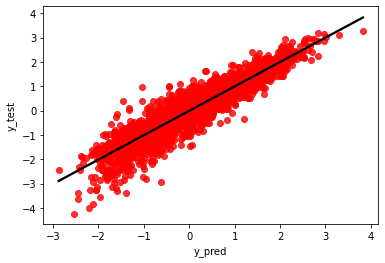

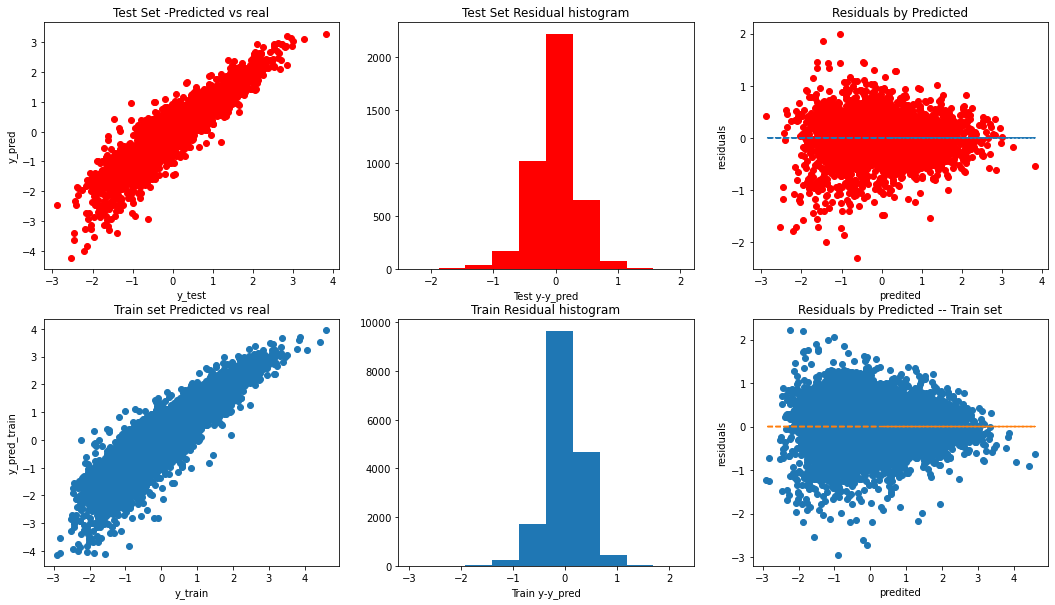

In [280]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plot_train_vs_test(x_train=x_train,y_pred= y_pred_test, x_test=x_test, y_test=y_test, y_pred_train=y_pred_train)

<a id='feature_importance'></a>
<a href='#content'>back to content list</a>

In [281]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model_l.coef_)
})


# seperate features
zip_mean = features_importances[features_importances['Attribute'].str.startswith('zip') == True]
grade_mean = features_importances[features_importances['Attribute'].str.startswith('grade') == True]
floors_mean = features_importances[features_importances['Attribute'].str.startswith('floor') == True]
condition_mean = features_importances[features_importances['Attribute'].str.startswith('condition') == True]
bedrooms_mean = features_importances[features_importances['Attribute'].str.startswith('bedroom') == True]

# drop this features from table
features_importances = features_importances[features_importances['Attribute'].str.startswith('zip') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('grade') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('floor') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('condition') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('bedroom') != True]


# add packed features with mean value to the featue list
features_importances.loc[features_importances.index.max() + 1] = ['grade', grade_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['zipcode', zip_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['floors', floors_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['condition', condition_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['bedrooms', bedrooms_mean['Importance'].values.mean()]

# sort and print
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,waterfront,1.068380
8,zipcode,0.959932
7,grade,0.904000
10,condition,0.427610
1,sqft_living,0.356053
5,yr_renovated,0.134555
6,sqft_living15,0.133007
9,floors,0.099651
11,bedrooms,0.086331
3,sqft_basement,0.080252


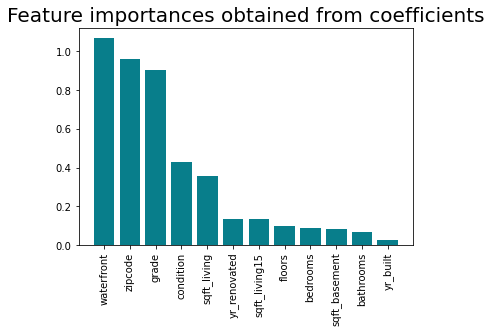

In [282]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Attribute', ylabel='Importance'>

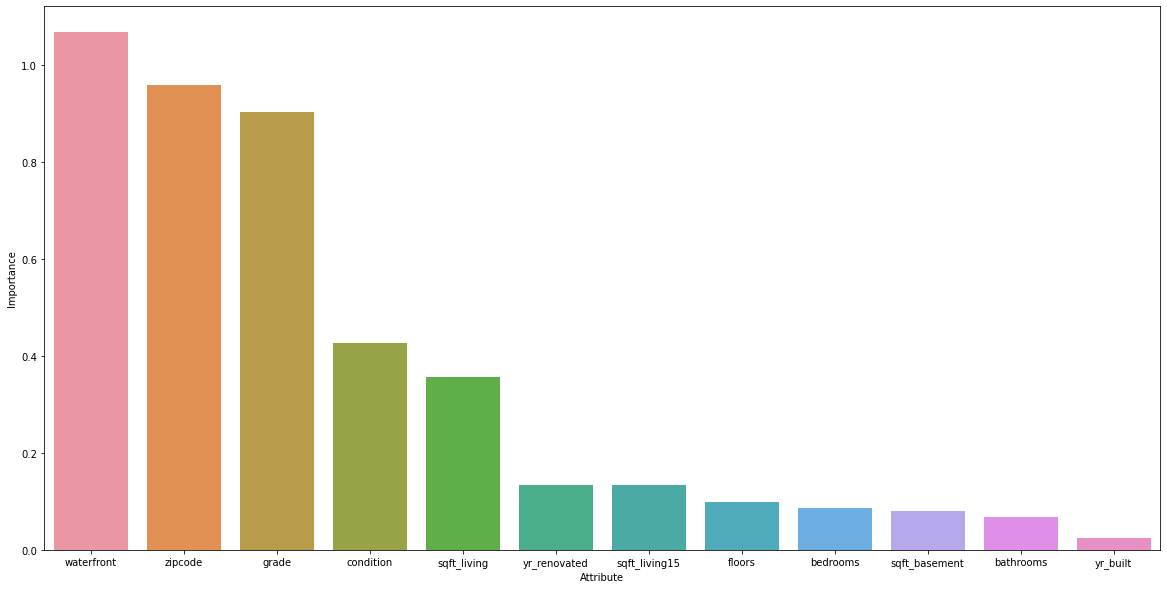

In [294]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x=features_importances['Attribute'], y=features_importances['Importance'])

In [283]:
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred_test)
print(R2_train)
print(R2_test)

0.8650646657434381
0.8652641410242095


<AxesSubplot:>

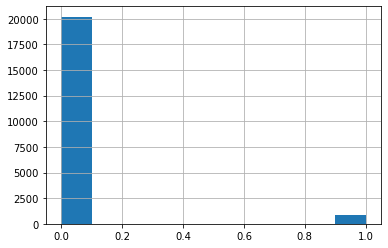

In [284]:
work_copy.yr_renovated.hist()

<AxesSubplot:>

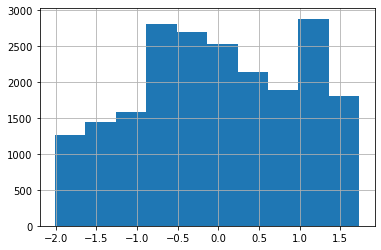

In [285]:
work_copy.yr_built.hist()